In [2]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [2]:
recipe_df = pd.read_csv("data/recipe_sample_balanced.csv", index_col=0)
recipe_df.head()

,title,ingredients,directions,NER,category
0,Butter Baked Rice (Oamc),"[""1 cup long grain rice"", ""1 teaspoon salt"", ""...","[""Measure rice and salt in a bowl and pour on ...","[""long grain rice"", ""salt"", ""butter"", ""garlic""...",Baking
1,Vegan Orange Dream,"[""1 12 cups orange juice, chilled"", ""1 cup lig...","[""In a blender, combine everything except the ...","[""orange juice"", ""light vanilla soymilk"", ""sil...",Baking
2,Baked Lima Beans,"[""1 lb. large dried lima beans, soaked overnig...","[""Soak beans overnight and rinse."", ""Cover wit...","[""beans"", ""brown sugar"", ""dry mustard"", ""onion...",Baking
3,Stromboli,"[""3 c. flour"", ""1 pkg. dry yeast"", ""2 Tbsp. su...","[""Combine 1 1/4 cups flour, yeast, sugar and s...","[""flour"", ""yeast"", ""sugar"", ""cooking oil"", ""sa...",Baking
4,Baked Clams,"[""3 pounds Littleneck clams"", ""1 cup cornmeal""...","[""Preheat oven to 350 degrees F."", ""Place clam...","[""Littleneck clams"", ""cornmeal"", ""salt"", ""brea...",Baking


In [3]:
recipe_df = recipe_df.reset_index(drop=True)

In [71]:
title_ner_data = recipe_df['title'].str.lower() + " " + recipe_df["NER"].str.lower()
title_ner_directions_data = (recipe_df['title'] + " " + recipe_df['directions'] + " " + recipe_df['NER']).str.lower()

In [72]:
nuts_pattern = (r"(peanuts?|pinenuts?|walnuts?|pecans?|almonds?|peanut butter"
                r"|marzipan|nougat|macadamia|brazil nuts?|pistachios?|cashews?|hazel\snuts?)")
# Ignore if it is almond, coconut or soy milk but capture milk and other variants
dairy_pattern = r"(?<!coconut\s)(?<!soy\s)(?<!almond\s)(milk|whey|casein|butter|cream|lactose|yogurt|custard|ghee|curds|sour\scream|cheese)"
# Ignore if it is almond, coconut etc flour but capture all purpose flour or flour and other gluten products
gluten_pattern = r"(?<!almond\s)(?<!chickpea\s)(?<!rice\s)(?<!coconut\s)(?<!tapioca\s)(?<!corn\s)(all\s?-?purpose\sflour|flour|wheat|barley|bulgar|couscous|seitan|rye|malt|pasta|spaghetti)"

recipe_df['is_nut_free'] = (~title_ner_data.str.contains(nuts_pattern, regex=True, na=False)).astype(int)
recipe_df['is_gluten_free'] = (~title_ner_data.str.contains(gluten_pattern, regex=True, na=False)).astype(int)
recipe_df['is_dairy_free'] = (~title_ner_data.str.contains(dairy_pattern, regex=True, na=False)).astype(int)

C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\1916240525.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_nut_free'] = (~title_ner_data.str.contains(nuts_pattern, regex=True, na=False)).astype(int)
C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\1916240525.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_gluten_free'] = (~title_ner_data.str.contains(gluten_pattern, regex=True, na=False)).astype(int)
C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\1916240525.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_dairy_free'] = (~title_ner_data.str.contains(dairy_pattern, regex=True, na=False)).astype(int)


In [40]:
recipe_df.head()

,title,ingredients,directions,NER,category,is_nut_free,is_gluten_free,is_dairy_free
0,Butter Baked Rice (Oamc),"[""1 cup long grain rice"", ""1 teaspoon salt"", ""...","[""Measure rice and salt in a bowl and pour on ...","[""long grain rice"", ""salt"", ""butter"", ""garlic""...",Baking,0,1,0
1,Vegan Orange Dream,"[""1 12 cups orange juice, chilled"", ""1 cup lig...","[""In a blender, combine everything except the ...","[""orange juice"", ""light vanilla soymilk"", ""sil...",Baking,1,1,0
2,Baked Lima Beans,"[""1 lb. large dried lima beans, soaked overnig...","[""Soak beans overnight and rinse."", ""Cover wit...","[""beans"", ""brown sugar"", ""dry mustard"", ""onion...",Baking,1,1,1
3,Stromboli,"[""3 c. flour"", ""1 pkg. dry yeast"", ""2 Tbsp. su...","[""Combine 1 1/4 cups flour, yeast, sugar and s...","[""flour"", ""yeast"", ""sugar"", ""cooking oil"", ""sa...",Baking,1,0,0
4,Baked Clams,"[""3 pounds Littleneck clams"", ""1 cup cornmeal""...","[""Preheat oven to 350 degrees F."", ""Place clam...","[""Littleneck clams"", ""cornmeal"", ""salt"", ""brea...",Baking,1,1,0


In [73]:
print(f"is_nut_free = {len(recipe_df[recipe_df['is_nut_free'] == 1])}")
print(f"is_gluten_free = {len(recipe_df[recipe_df['is_gluten_free'] == 1])}")
print(f"is_dairy_free = {len(recipe_df[recipe_df['is_dairy_free'] == 1])}")

is_nut_free = 68029
is_gluten_free = 54716
is_dairy_free = 26745


In [74]:
def get_distribution(column, distribution_col_names, sort_by):
    distribution = pd.crosstab(recipe_df['category'], recipe_df[column], margins=True)
    distribution.columns = distribution_col_names
    print(distribution.sort_values(by=sort_by, ascending=False))
    return distribution

In [75]:
nut_free_distribution = get_distribution("is_nut_free", ['Contains nuts', 'Nut_Free', 'Total'], sort_by="Nut_Free")
nut_free_distribution = nut_free_distribution.drop('All', axis=0)

                      Contains nuts  Nut_Free  Total
category                                            
All                            8971     68029  77000
Soup                            173      6827   7000
Mains                           326      6674   7000
Grains and Pasta                420      6580   7000
Vegan                           583      6417   7000
Drinks                          597      6403   7000
Condiments and sides            598      6402   7000
Other                           942      6058   7000
Breads                          993      6007   7000
Baking                         1026      5974   7000
Salads                         1485      5515   7000
Sweet                          1828      5172   7000


In [76]:
gluten_free_distribution = get_distribution("is_gluten_free", ['Contains Gluten', 'Gluten_Free', 'Total'], sort_by="Gluten_Free")
gluten_free_distribution = gluten_free_distribution.drop('All', axis=0)

                      Contains Gluten  Gluten_Free  Total
category                                                 
All                             22284        54716  77000
Salads                            465         6535   7000
Vegan                             913         6087   7000
Condiments and sides             1077         5923   7000
Mains                            1102         5898   7000
Drinks                           1491         5509   7000
Soup                             1675         5325   7000
Other                            1737         5263   7000
Baking                           2276         4724   7000
Sweet                            2952         4048   7000
Breads                           3770         3230   7000
Grains and Pasta                 4826         2174   7000


In [77]:
dairy_free_distribution = get_distribution("is_dairy_free", ['Contains Dairy', 'Dairy_Free', 'Total'], sort_by="Dairy_Free")
dairy_free_distribution = dairy_free_distribution.drop('All', axis=0)

                      Contains Dairy  Dairy_Free  Total
category                                               
All                            50255       26745  77000
Vegan                            579        6421   7000
Drinks                          4000        3000   7000
Soup                            4003        2997   7000
Mains                           4186        2814   7000
Salads                          4266        2734   7000
Condiments and sides            5247        1753   7000
Grains and Pasta                5343        1657   7000
Breads                          5466        1534   7000
Baking                          5560        1440   7000
Sweet                           5652        1348   7000
Other                           5953        1047   7000


In [78]:
dietery_contraints = {
    "nut_free": nut_free_distribution["Nut_Free"],
    "gluten_free": gluten_free_distribution["Gluten_Free"],
    "dairy_free": dairy_free_distribution["Dairy_Free"]
}

dietery_df = pd.DataFrame.from_dict(dietery_contraints, orient='columns')
dietery_df

,nut_free,gluten_free,dairy_free
category,,,
Baking,5974,4724,1440
Breads,6007,3230,1534
Condiments and sides,6402,5923,1753
Drinks,6403,5509,3000
Grains and Pasta,6580,2174,1657
Mains,6674,5898,2814
Other,6058,5263,1047
Salads,5515,6535,2734
Soup,6827,5325,2997


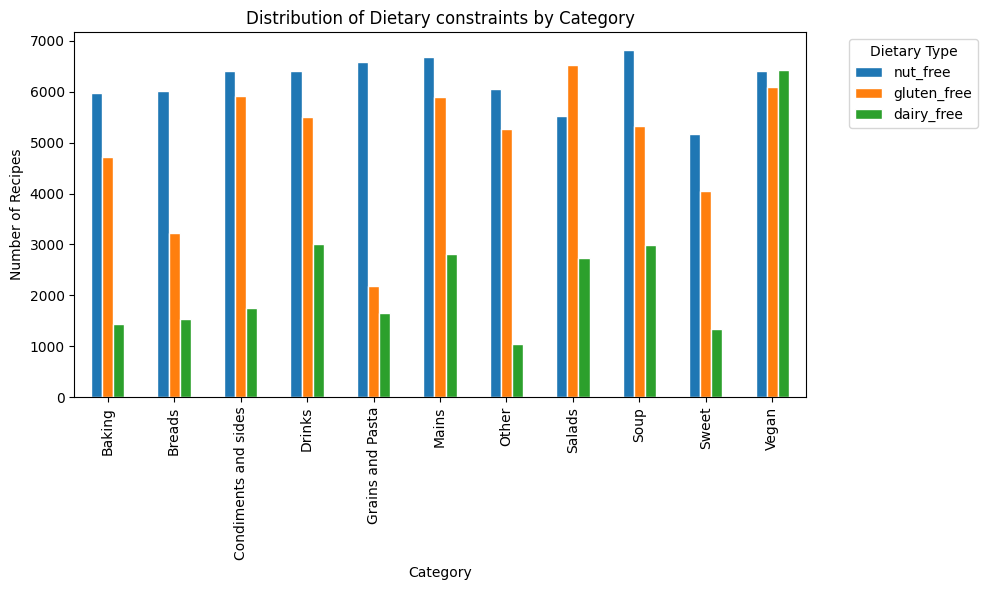

In [79]:
ax = dietery_df.plot(
        kind='bar', 
        stacked=False, 
        figsize=(10, 6), # Soft red for contains, soft blue for free
        edgecolor='white'
    )
plt.title(f'Distribution of Dietary constraints by Category')
plt.xlabel('Category')
plt.ylabel('Number of Recipes')
plt.legend(title='Dietary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
occasion_lexicons = {   
    "vibe_summer": r"(summer|grill|bbq|refreshing|cold|chilled|salad|light|beach|picnic|citrus|lemon|berries)",
    "vibe_winter": r"(winter|comfort|hearty|stew|soup|roast|slow cooker|casserole|warm|cozy|holiday|christmas|thanksgiving)",    
    "vibe_party": r"(appetizer|dip|snack|bite-sized|party|crowd|platter|skewer|finger food|wings|nachos)"
}
is_spicy_pattern = r"(chili|jalapeno|habanero|sriracha|spicy|hot sauce|cayenne|wasabi|chipotle|peppers?)"
is_comfort_food_pattern = r"(cheese|creamy|mashed|fried|gravy|casserole|bread|stew)"
is_light_food_pattern =  r"(salad|citrus|cucumber|steamed|grilled|broth|low-carb|fresh|vinaigrette|zucchini)"
is_hearty_food_pattern =  r"(beef|steak|pork|beans|lentils|thick|chunky|stew|sausage|roast|filling|protein-rich)"


recipe_df['is_spicy_food'] = (title_ner_directions_data.str.contains(is_spicy_pattern, regex=True, na=False)).astype(int)
recipe_df['is_comfort_food'] = (title_ner_directions_data.str.contains(is_comfort_food_pattern, regex=True, na=False)).astype(int)
recipe_df['is_light_food'] = (title_ner_directions_data.str.contains(is_light_food_pattern, regex=True, na=False)).astype(int)
recipe_df['is_hearty_food'] = (title_ner_directions_data.str.contains(is_hearty_food_pattern, regex=True, na=False)).astype(int)

recipe_df['is_healthy'] = (recipe_df['is_light_food'] & ~recipe_df['is_comfort_food']).astype(int)

C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\2945752370.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_spicy_food'] = (title_ner_directions_data.str.contains(is_spicy_pattern, regex=True, na=False)).astype(int)
C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\2945752370.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_comfort_food'] = (title_ner_directions_data.str.contains(is_comfort_food_pattern, regex=True, na=False)).astype(int)
C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\2945752370.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_light_food'] = (title_ner_directions_data.str.contains(is_light_food_pattern, regex=True, na=False)).astype(int)
C:\Users\sa

In [83]:
food_pref_cols = ["is_spicy_food", "is_hearty_food", "is_comfort_food", "is_light_food", "is_healthy"]
food_pref_dict = defaultdict(int)
for column in food_pref_cols:
    food_pref_dict[column] = len(recipe_df.loc[recipe_df[column] == 1])
    
food_pref_df = pd.DataFrame.from_dict(food_pref_dict, orient='index')
food_pref_df

,0
is_spicy_food,33754
is_hearty_food,29219
is_comfort_food,36449
is_light_food,27529
is_healthy,14119


In [84]:
def plot_bar_chart(df, title, x_label, y_label, legend_label="", show_legend=False):
    ax = df.plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if show_legend:
        plt.legend(title=legend_label, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

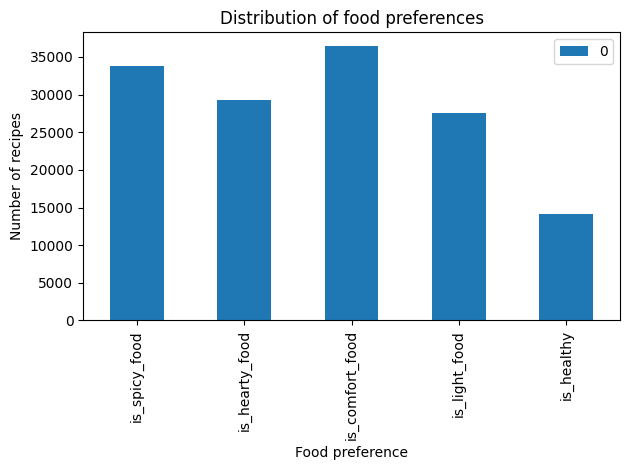

In [85]:
plot_bar_chart(food_pref_df, "Distribution of food preferences", "Food preference", "Number of recipes")

In [102]:
breakfast_pattern = r"(breakfast|pancakes?|cereals?|oatmeal|toast|omelet|morning|brunch|muffin)"
recipe_df['is_breakfast'] = (title_ner_directions_data.str.contains(breakfast_pattern, regex=True, na=False)).astype(int)

C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\3874654617.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_breakfast'] = (title_ner_directions_data.str.contains(breakfast_pattern, regex=True, na=False)).astype(int)


In [87]:
lunch_pattern = r"(sandwich|wrap|salad|soup|lunchbox|pita|burger|taco|luncheon|lunch)"
recipe_df['is_lunch'] = (title_ner_directions_data.str.contains(lunch_pattern, regex=True, na=False)).astype(int)

C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\1402761865.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_lunch'] = (title_ner_directions_data.str.contains(lunch_pattern, regex=True, na=False)).astype(int)


In [88]:
dinner_pattern = r"(dinner|roast|casserole|pasta|steak|salmon|main course|risotto)"
recipe_df['is_dinner'] = (title_ner_directions_data.str.contains(dinner_pattern, regex=True, na=False)).astype(int)

C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\3167638530.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['is_dinner'] = (title_ner_directions_data.str.contains(dinner_pattern, regex=True, na=False)).astype(int)


In [103]:
meal_time_cols = ["is_breakfast", "is_lunch", "is_dinner"]
meal_time_dict = defaultdict(int)
for column in meal_time_cols:
    meal_time_dict[column] = len(recipe_df.loc[recipe_df[column] == 1])
    
meal_time_df = pd.DataFrame.from_dict(meal_time_dict, orient='index')
meal_time_df

,0
is_breakfast,6492
is_lunch,25987
is_dinner,17023


In [100]:
# Define cooking patterns
cooking_methods = {
    "is_no_oven": r"^(?!.*(bake|roast|broil|oven|preheat)).*$", # Negative lookahead: no oven verbs
    "is_slow_cooker": r"(slow cooker|crockpot|set and forget|crock pot|slowcooker|braising|braise)",
    "is_air_fryer": r"(air fryer|airfried|air fried|airfryer)",
    "is_one_pot": r"(one pot|one-pot|skillet|sheet pan|single pot|onepot|sheet-pan|single-pot)"
}

for tag, pattern in cooking_methods.items():
    recipe_df[tag] = title_ner_directions_data.str.contains(pattern, regex=True).astype(int)

C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\3579627731.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df[tag] = title_ner_directions_data.str.contains(pattern, regex=True).astype(int)
C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\3579627731.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df[tag] = title_ner_directions_data.str.contains(pattern, regex=True).astype(int)
C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\3579627731.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df[tag] = title_ner_directions_data.str.contains(pattern, regex=True).astype(int)
C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\3579627731.py:10: UserWarning: This pattern is interpreted as a regular ex

In [101]:
cooking_methods_dict = defaultdict(int)
for column in cooking_methods.keys():
    cooking_methods_dict[column] = len(recipe_df.loc[recipe_df[column] == 1])
    
cooking_methods_df = pd.DataFrame.from_dict(cooking_methods_dict, orient='index')
cooking_methods_df

,0
is_no_oven,42861
is_slow_cooker,1423
is_air_fryer,5
is_one_pot,10311


In [104]:
recipe_df["directions"] = recipe_df["directions"].apply(ast.literal_eval)

In [105]:
def get_count(directions):
    num_steps = len(directions)
    if num_steps <= 2:
        num_steps = 0
        for step in directions:
            split_steps = step.split(".")
            num_steps += len(split_steps)
    return num_steps


recipe_df["steps_counts"] = recipe_df["directions"].map(get_count)
recipe_df["steps_counts"].describe()

count    77000.00000
mean         7.30226
std          5.07116
min          1.00000
25%          4.00000
50%          6.00000
75%          9.00000
max        145.00000
Name: steps_counts, dtype: float64

In [106]:
passive_time_pattern = r"(soak|marinate|refrigerate|overnight|chill|rest|rise|proof|hours?)"
full_text = recipe_df['directions'].str.lower()
recipe_df['has_passive_time'] = (title_ner_directions_data.str.contains(passive_time_pattern, regex=True, na=False)).astype(int)
recipe_df['is_quick'] = ((recipe_df['steps_counts'] < 4) & (recipe_df['has_passive_time'] == 0) & (recipe_df['is_slow_cooker'] == 0)).astype(int)

C:\Users\sapar\AppData\Local\Temp\ipykernel_36228\1887085558.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df['has_passive_time'] = (title_ner_directions_data.str.contains(passive_time_pattern, regex=True, na=False)).astype(int)


In [107]:
len(recipe_df[recipe_df["is_quick"] == 1])

8457

In [108]:
recipe_df.columns

Index(['title', 'ingredients', 'directions', 'NER', 'category', 'is_nut_free',
       'is_gluten_free', 'is_dairy_free', 'is_spicy_food', 'is_comfort_food',
       'is_light_food', 'is_hearty_food', 'is_healthy', 'is_breakfast',
       'is_lunch', 'is_dinner', 'is_no_oven', 'is_slow_cooker', 'is_air_fryer',
       'is_one_pot', 'steps_counts', 'has_passive_time', 'is_quick'],
      dtype='str')

In [109]:
recipe_df.to_csv("data/processed_recipes.csv", index=False)

In [3]:
recipe_df.to_json("data/processed_recipes.json", orient="records", indent=4)